In [1]:
## Importing Libraries

In [33]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB7
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [34]:
# Define the number of classes in your classification task
NUM_CLASSES = 5  # For example, if you have 10 classes

In [35]:
## Data Preprocessing
# Training Image Preprocessing

training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7392 files belonging to 5 classes.


In [36]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2160 files belonging to 5 classes.


In [37]:
# Define the input shape
input_shape = (128, 128, 3)

# Load the pre-trained EfficientNetB7 model
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the convolutional base
base_model.trainable = False

In [38]:
# Create a new model on top
inputs = tf.keras.Input(shape=input_shape)
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)  # NUM_CLASSES is the number of output classes
model = tf.keras.Model(inputs, outputs)

In [39]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
# Train the model
history = model.fit(training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 645s 3s/step - accuracy: 0.5454 - loss: 0.9485 - val_accuracy: 0.6894 - val_loss: 0.6932
Epoch 2/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 592s 3s/step - accuracy: 0.7091 - loss: 0.6612 - val_accuracy: 0.7542 - val_loss: 0.5920
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 556s 2s/step - accuracy: 0.7419 - loss: 0.5998 - val_accuracy: 0.7764 - val_loss: 0.5403
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 548s 2s/step - accuracy: 0.7728 - loss: 0.5475 - val_accuracy: 0.7782 - val_loss: 0.5198
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 516s 2s/step - accuracy: 0.7886 - loss: 0.5183 - val_accuracy: 0.7921 - val_loss: 0.4972
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 517s 2s/step - accuracy: 0.7917 - loss: 0.4978 - val_accuracy: 0.7486 - val_loss: 0.5517
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 509s 2s/step - accuracy: 0.8128 - loss: 0.4737 - val_accuracy: 0.8051 - val_loss: 0.4659
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 511s 2s/step - accuracy: 0.8129 - loss: 0.4648 - val_accu

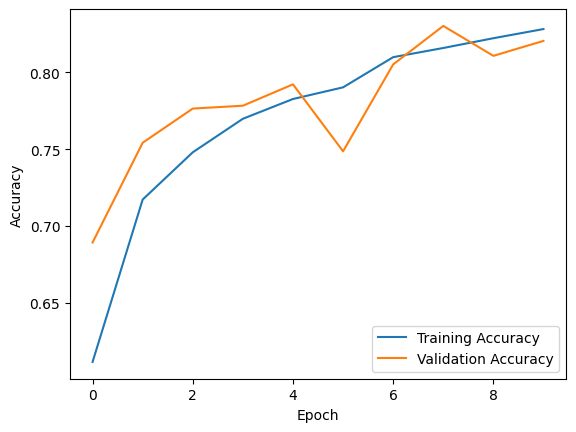

In [41]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
